In [23]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import scipy as sp
import os, samples
import joblib
from sklearn.model_selection import GridSearchCV

if __name__ == '__main__':
    x_data = []
    y_data = []

    classes = {}

    root="../data_cut_back_front"
    type_list = ["dda", "duck"]

    print ("Loading the dataset from '{0}'...".format(root)),
    
    # 지정한 폴더에서 데이터 파일을 불러와 학습 진행
    for path, subdirs, files in os.walk(root):
        for name in files:
            filename = os.path.join(path, name)
            # 샘플들을 불러온다
            sample = samples.Sample.load_from_file(filename)
            
            # 데이터를 선형화하여 데이터에 추가
            x_data.append(sample.get_linearized())

            # 카테고리 -> 파일 이름에 포함 ex) dda_sample_1.txt
            category = name.split("_")[0]

            # 라벨링을 위해 type_list에서 해당하는 카테고리의 번호를 찾는다.
            number = type_list.index(category)

            # x_data에 대한 라벨 추가
            y_data.append(number)
            
            #Include the category and the corresponding number into a dictionary
            #for easy access and referencing
            classes[number] = category

    print ("DONE")

    # 데이터셋 분리
    X_train, X_test, Y_train, Y_test = train_test_split(x_data, 
                y_data, test_size=0.15, random_state=0)

    #Parameters used in the cross-validated training process
    #The library automatically tries every possible combination to
    #find the best scoring one.
    params = {'C':[0.001 * i for i in range(1, 1000, 10)], 'kernel':['linear']}
    #params = {'C':[0.001], 'kernel':['linear']}

    #Inizialize the model
    svc = svm.SVC(probability = True)
    #Inizialize the GridSearchCV with 8 processing cores and maximum verbosity
    clf = GridSearchCV(svc, params, scoring='accuracy', cv=10, verbose = 1, n_jobs = 8)

    print ("Starting the training process...")

    #Start the training process
    clf.fit(X_train, Y_train)

    print ("\nBest estimator parameters: ")
    print (clf.best_estimator_)

    #Calculates the score of the best estimator found.
    score = clf.score(X_test, Y_test)

    print ("\nSCORE: {score}\n".format(score = score))

    print ("Saving the model...",)
    joblib.dump(clf, 'model.pkl') 
    joblib.dump(classes, 'classes.pkl') 

    print ("DONE")

Loading the dataset from '../data_cut_back_front'...
DONE
Starting the training process...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits

Best estimator parameters: 
SVC(C=0.721, kernel='linear', probability=True)

SCORE: 0.76

Saving the model...
DONE


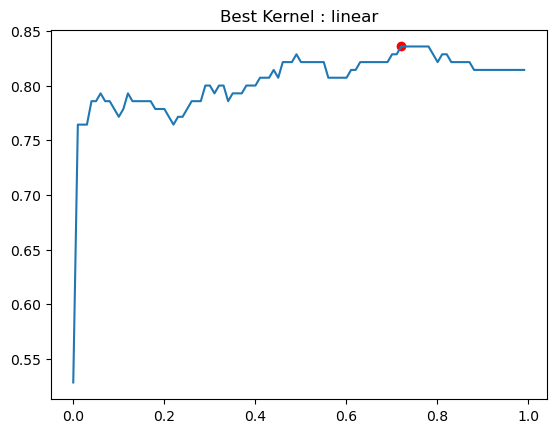

In [24]:
import matplotlib.pyplot as plt

best_kernel = clf.best_params_['kernel'] ## 최적 커널
## 최적 커널을 갖는 인덱스만 추출
target_idx = [i for i, x in enumerate(clf.cv_results_['params']) if x['kernel']==best_kernel]
## Grid Search에 사용된 C값
target_C = [x['C'] for x in clf.cv_results_['params'] if x['kernel']==best_kernel]
## 교차 검증 스코어
mean_test_score = clf.cv_results_['mean_test_score'][target_idx]
 
## 최적 커널에 대하여 C에 대한 교차 검증 스코어 값 시각화
fig = plt.figure()
fig.set_facecolor('white')
 
plt.plot(target_C, mean_test_score)
plt.scatter(clf.best_params_['C'], clf.best_score_, color='red')
plt.title(f'Best Kernel : {best_kernel}')
plt.show()



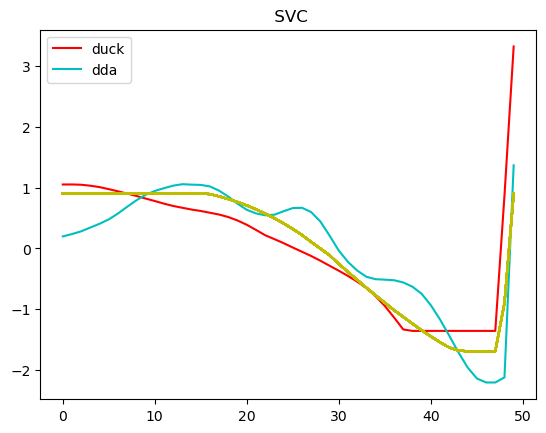

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

check_clf = svm.SVC(kernel='linear', C=clf.best_params_['C'])
check_clf.fit(X_train, Y_train)
def showplt(x,y,svm1,title):
    fig = plt.figure()
    #ax = fig.gca(projection='3d')
    
    y_1 = 0
    y_0 = 0
    for i in range(len(x)):
        #ax.scatter(range(1,len(x[i])+1), x[i], y[i], s=30, c=ccolor)
        if y[i] == 1:
            if y_0 == 0:
                plt.plot(x[i], c='r', label="duck")
                y_0 = 1
           # else:
            #    plt.plot(x[i], c='r')
        else :
            if y_1 == 0:
                plt.plot(x[i], c='c', label="dda")
                y_1 = 1
            #else:
            #    plt.plot(x[i], c='c')
        
    


    #Support Vector        
    for i in range(len(svm1.support_vectors_)):        
        #ax.scatter(range(1,len(svm1.support_vectors_[i])+1), svm1.support_vectors_[i], facecolors='y')
        plt.plot(svm1.support_vectors_[10], c='y')
    plt.title(title)
    plt.legend()
    plt.show()
    


showplt(x_data, y_data, check_clf," SVC")